**My Python Project - NFL Player Valuation**

My aim is to determine which players or positions are a higher value, based on salary vs points scored. I want to determine which positions typically are paid the best and which score the most points. 

I retrieved my data from the following site: [Pro Football Reference](https://www.pro-football-reference.com)


In [59]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [60]:
# Setting the display option in pandas for large numbers, to use commas and 2 decimal places
pd.set_option('display.float_format', '{:,.2f}'.format)

In [61]:
# Set URL of data to a variable, url, in order to inport the data into Python
# After importing, examine the head of the data to insure it imported properly
url = 'https://raw.githubusercontent.com/BrianBehnke/Week5-NFL-Salary-Project/master/NFLdataExtract2.csv'
nfl_data=pd.read_csv(url)
nfl_data.head()

,Number of Records,Passing TDs,Player,Position,Pts,Salary,Team,Points
0,1,0,A.J. Derby,TE,12,705000,2TM,12
1,1,0,A.J. Green,WR,48,10550000,CIN,48
2,1,0,Aaron Jones,RB,24,489706,GNB,24
3,1,0,Adam Humphries,WR,6,2914000,TAM,6
4,1,0,Adam Shaheen,TE,18,733661,CHI,18


**Summary Statistics**

I will run a series of summary statistics to gain a better understanding of the data
I want to determine data types, means, standard deviations, and min/max values

In [62]:
# Examine the shape of the dataframe, to insure the data includes all columns and observations
nfl_data.shape

(408, 8)

In [63]:
# Determine the types of data for each column. 
# Numeric: Number of Records, Passing TDs, Pts, Salary, Points
# Categorical: Position, Team
nfl_data.dtypes

Number of Records     int64
Passing TDs           int64
Player               object
Position             object
Pts                   int64
Salary                int64
Team                 object
Points                int64
dtype: object

In [64]:
nfl_data.describe()

,Number of Records,Passing TDs,Pts,Salary,Points
count,408.00,408.00,408.00,408.00,408.00
mean,1.00,1.04,24.25,"2,411,661.70",30.50
std,0.00,4.63,29.07,"3,137,376.64",38.84
min,1.00,0.00,1.00,"121,600.00",1.00
25%,1.00,0.00,6.00,"637,500.00",6.00
50%,1.00,0.00,12.00,"1,000,000.00",12.00
75%,1.00,0.00,30.00,"2,517,500.00",36.00
max,1.00,34.00,158.00,"22,500,000.00",222.00



I want to remove a couple of extraneous columns. They are duplicates or used for calculating other columns. 
They are no longer needed for my analysis. 


In [65]:
# Dropping extraneous columns, to avoid confusion
nfl_data = nfl_data.drop('Number of Records', axis=1)
nfl_data = nfl_data.drop('Passing TDs', axis=1)
nfl_data = nfl_data.drop('Pts', axis=1)

In [66]:
# Verifying that the proper columns were dropped. 
nfl_data.head()

,Player,Position,Salary,Team,Points
0,A.J. Derby,TE,705000,2TM,12
1,A.J. Green,WR,10550000,CIN,48
2,Aaron Jones,RB,489706,GNB,24
3,Adam Humphries,WR,2914000,TAM,6
4,Adam Shaheen,TE,733661,CHI,18


Created a new dataframe with a small subset of the data, to better chart the values. 

In [67]:
# Creating a new dataframe using just observations where the Points
# value is over 40, to reduce data conglomeration around origin on chart
nfl_scorers = nfl_data.loc[nfl_data['Points'] >= 40]


In [68]:
# Updating new dataframe with only players who's salary is over $1,000,000
# To further clean up charts
nfl_scorers = nfl_scorers.loc[nfl_scorers['Salary'] >= 1000000]
nfl_scorers.head().T

,1,6,16,20,21
Player,A.J. Green,Adam Vinatieri,Alex Smith,Alshon Jeffery,Alvin Kamara
Position,WR,K,QB,WR,RB
Salary,10550000,2625000,13000000,1000000,6350000
Team,CIN,IND,KAN,PHI,NOR
Points,48,109,162,60,86


Recalculating summary statistics on my smaller dataset, to better understand the changes made by reducing the number of observations.

In [69]:
# Calculating the mean value of Salary
nfl_scorers['Salary'].mean()

4600796.1875

In [70]:
# Calculating the mean value of Points
nfl_scorers['Points'].mean()

91.078125

In [71]:
# Looking at the summary statistics of the dataframe by
# grouping Position and Salary, to make preliminary assessments of the data
nfl_scorers.groupby(['Position'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
K,17.00,"2,061,176.47","674,640.02","1,015,000.00","1,750,000.00","2,000,000.00","2,500,000.00","3,200,000.00"
QB,15.00,"9,102,301.87","5,885,462.11","1,050,000.00","5,000,000.00","9,500,000.00","12,500,000.00","22,500,000.00"
RB,14.00,"2,716,539.29","1,712,091.12","1,000,000.00","1,549,782.25","2,000,000.00","3,417,189.50","6,350,000.00"
TE,5.00,"4,834,400.00","2,974,248.53","1,450,000.00","1,897,000.00","6,025,000.00","6,800,000.00","8,000,000.00"
WR,13.00,"4,667,144.46","4,037,996.01","1,000,000.00","1,087,850.00","3,500,000.00","7,500,000.00","12,500,000.00"


In [72]:
# Looking at the summary statistics of the dataframe by
# grouping Position and Points, to make preliminary assessments of the data
nfl_scorers.groupby(['Position'])['Points'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
K,17.00,115.12,30.81,48.00,99.00,119.00,137.00,158.00
QB,15.00,144.80,40.66,48.00,124.00,138.00,172.00,222.00
RB,14.00,55.00,13.42,42.00,48.00,48.00,60.00,86.00
TE,5.00,50.00,7.35,42.00,48.00,48.00,50.00,62.00
WR,13.00,52.31,9.69,42.00,48.00,50.00,54.00,78.00


In [73]:
# Looking at summary statistics of the entire dataframe,
# which only calculates numeric columns
nfl_scorers.describe()

,Salary,Points
count,64.00,64.00
mean,"4,600,796.19",91.08
std,"4,409,609.08",47.37
min,"1,000,000.00",42.00
25%,"1,649,346.75",48.00
50%,"2,562,500.00",72.00
75%,"6,462,500.00",131.50
max,"22,500,000.00",222.00


In [74]:
# Looking at a random sample of 10 observations to ensure all 
# observations look like they should
nfl_scorers.sample(10)

,Player,Position,Salary,Team,Points
209,Jimmy Graham,TE,1450000,SEA,62
192,Jared Goff,QB,2989788,LAR,174
212,Joe Flacco,QB,12000000,BAL,114
280,Mark Ingram,RB,4000000,NOR,72
156,Ezekiel Elliott,RB,2718758,DAL,54
334,Rob Gronkowski,TE,8000000,NWE,50
270,LeSean McCoy,RB,6075000,BUF,48
208,Jimmy Garoppolo,QB,6200000,SFO,48
75,Case Keenum,QB,8000000,MIN,138
287,Marvin Jones,WR,7000000,DET,54


**Plotting charts**
I am plotting several charts with different columns to determine best fit for my hypothesis and the data

This chart of players and salary was exploratory but interesting to see the range of salary in a visual way.
Unfortunately, not very useful for my project. And much too large for a blog post.

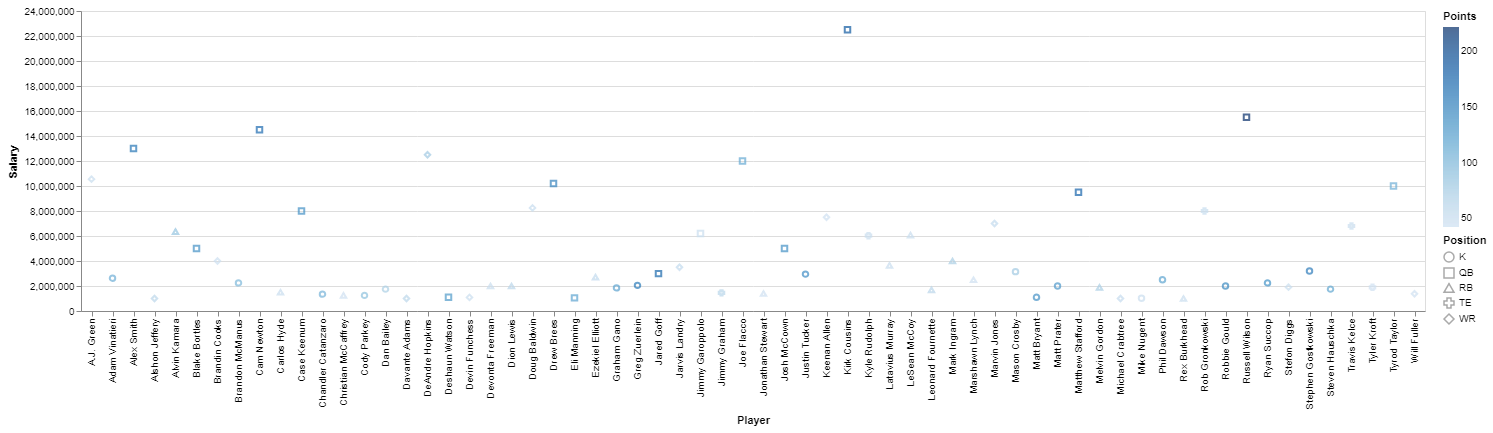

In [75]:
# Plotting Player vs Salary, along with secondary values for Points and Position
# to get a feel for how data looks in chart
# Chart is a little too wide for blog post though
alt.Chart(nfl_scorers).mark_point().encode(
    x='Player',
    y='Salary',
    color='Points',
    shape='Position'
)

This chart is closer to what I was looking for and more useful for analyzing the value of players. Not many options added to this chart, but I think it tells a good starter story, where the data points live and their spread. 

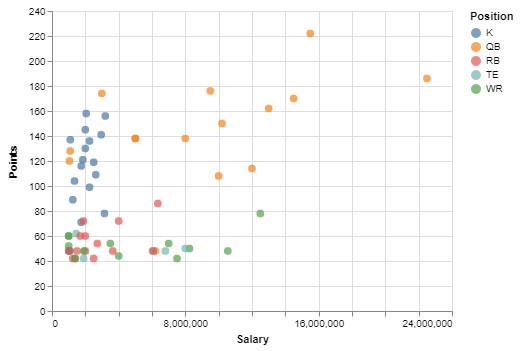

In [76]:
# Chart without player as chart value, to reduce size and make easier to visualize
alt.Chart(nfl_scorers).mark_circle(size=60).encode(
    x='Salary',
    y='Points',
    color='Position',
    tooltip=['Player', 'Salary', 'Points', 'Position']
).interactive()

A fine example of adding too much to a chart. The legend is a mess and makes it difficult to understand. Team likely isnt a useful variable for my analysis.

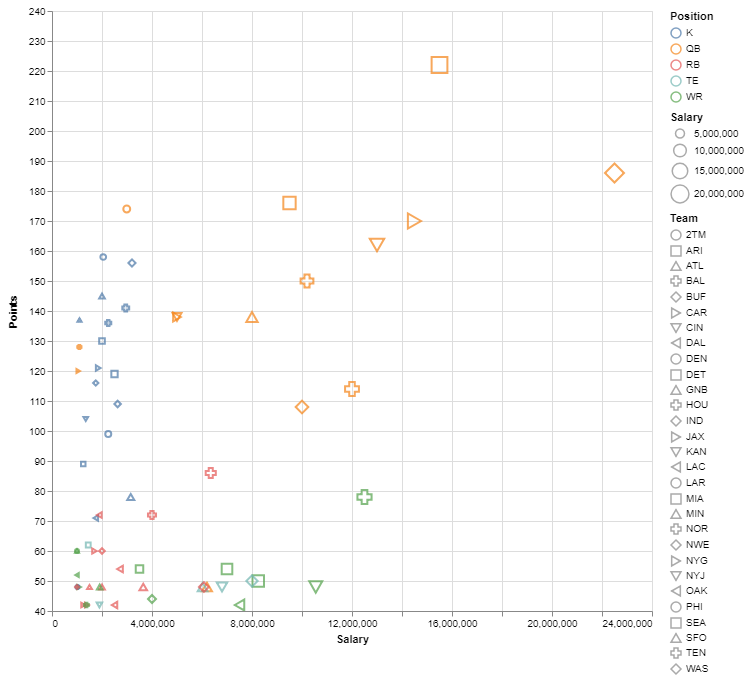

In [77]:
# Another chart example to see all the variables together
# This one has too many legend items to be clear
alt.Chart(nfl_scorers).mark_point().encode(
    alt.X('Salary', scale=alt.Scale(zero=False)),
    alt.Y('Points', scale=alt.Scale(zero=False, padding=1)),
    color='Position',
    size='Salary',
    shape='Team',
    tooltip=['Player', 'Team', 'Salary', 'Points', 'Position']
).configure_view(height=600, width=600).interactive()

Found a chart that gives a clear view of the data and will make for a good base chart. Just need to add more details.

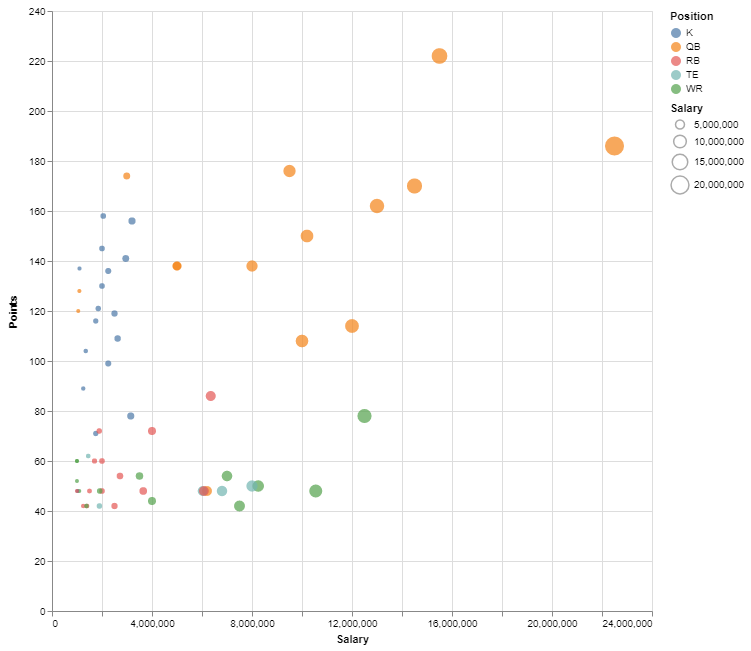

In [78]:
# More charting tests, removing the tea from the chart makes it easier to understand
# This is a good baseline chart to work with
alt.Chart(nfl_scorers).mark_circle().encode(
    alt.X('Salary', scale=alt.Scale(zero=True)),
    alt.Y('Points', scale=alt.Scale(zero=True, padding=1)),
    color='Position',
    size='Salary',
    tooltip=['Player', 'Salary', 'Points', 'Position']
).interactive().configure_view(height=600, width=600)

Trying to see if I can make a double chart that is interactive between both charts. I really liked this idea and it looks like it would be really useful, but not for my data. I need one that doesnt cause the legend to become difficult to use.

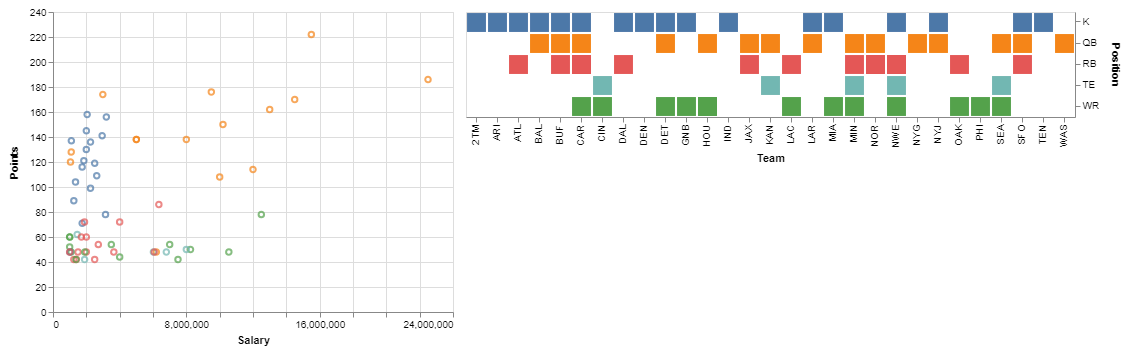

In [79]:
# Trying a chart with an interactive legend
# Again too large of legend, too busy with using Team here
selection = alt.selection_multi(fields=['Position', 'Team'])
color = alt.condition(selection,
                      alt.Color('Position:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(nfl_scorers).mark_point().encode(
    x='Salary:Q',
    y='Points:Q',
    color=color,
    tooltip='Player'
)

legend = alt.Chart(nfl_scorers).mark_rect().encode(
    y=alt.Y('Position:N', axis=alt.Axis(orient='right')),
    x='Team',
    color=color
).add_selection(
    selection
)

scatter | legend

Back to my base chart, adding new elements. Looking better and getting close to telling a story without words. I am not convinced that I want a 2 variable legend, it may make it more difficult to understand with too much going on with the chart.

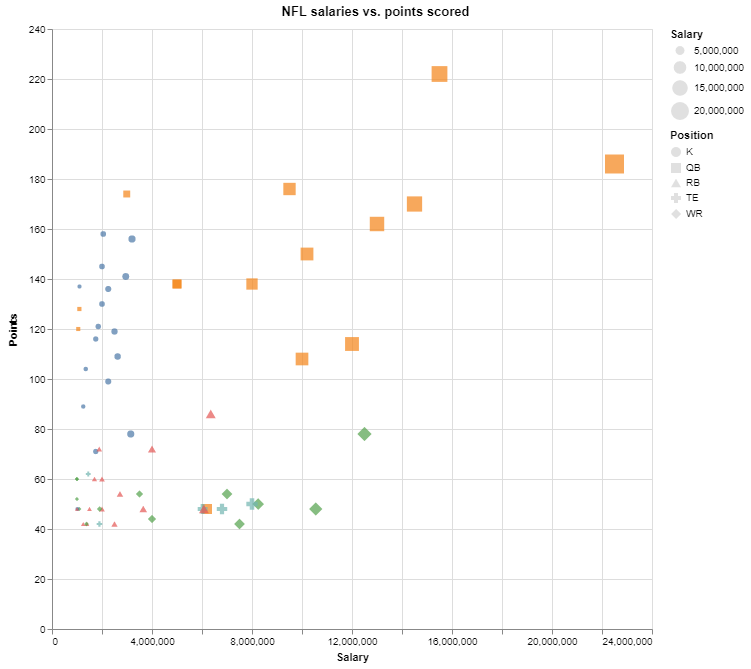

In [80]:
# Adding some more details to the chart, including an interactive dropdown selector
# This chart has promise and starting to show the information I want
input_dropdown = alt.binding_select(options=['QB','RB','WR', 'K', 'DB', 'DL', 'TE', 'LB'])
selection = alt.selection_single(fields=['Position'], bind=input_dropdown, name='Player ')
color = alt.condition(selection,
                    alt.Color('Position:N', legend=None),
                    alt.value('lightgray'))

myChart = alt.Chart(nfl_scorers).mark_point(filled=True).encode(
    x='Salary:Q',
    y='Points:Q',
    color=color,
    tooltip=('Player', 'Salary', 'Team', 'Position'),
    size='Salary',
    shape='Position'
).add_selection(
    selection
).configure_view(height=600, width=600).properties(title="NFL salaries vs. points scored")
myChart


**Final Chart**

This chart will be the one I use as my main chart for story telling. It is interactive so the viewer can do further digging into the information. It also stands on its own with being able to understand the data. Its also visually more appealing than the prior chart, with not too much happening. 

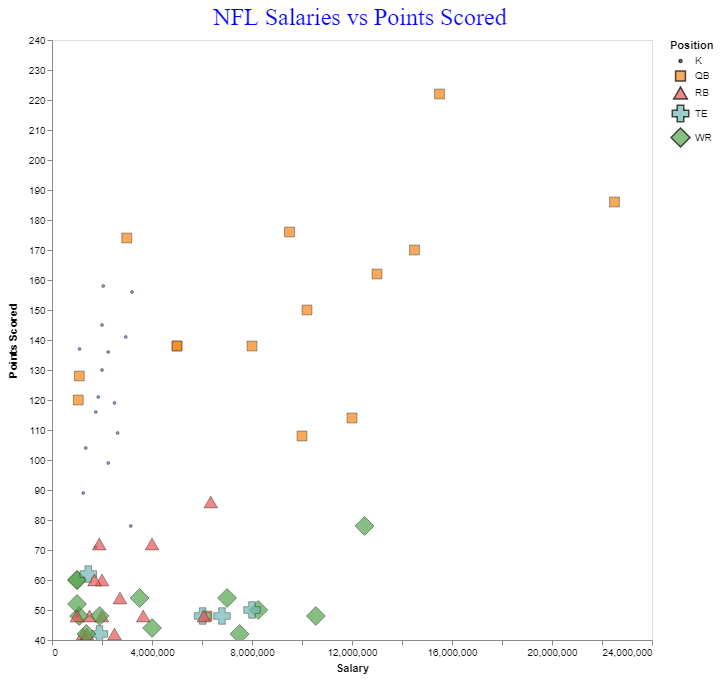

In [81]:
# More details and polish to the above chart. Keeping the interactivity
# and adding finishing touches and allowing for exporting of html and json output 
# for embedding into a blog post
input_dropdown = alt.binding_select(options=['QB','RB','WR', 'K', 'TE'])
selection = alt.selection_single(fields=['Position'], bind=input_dropdown, name='Player')
color = alt.condition(selection,
                    alt.Color('Position:N', scale=alt.Scale(scheme='tableau10')),
                    alt.value('lightgray'))
sizes = alt.Size('Position',scale=alt.Scale(zero=False))
title_str = "NFL Salaries vs Points Scored"

myChart2 = alt.Chart(nfl_scorers).mark_point(filled=True, stroke="black", strokeWidth=.5

).encode(
    alt.X('Salary:Q',scale=alt.Scale(zero=False), 
          axis=alt.Axis(title='Salary', grid=False)),
    alt.Y('Points:Q',scale=alt.Scale(zero=False),axis=alt.Axis(title='Points Scored', grid=False)),

    color=color,
    tooltip=('Player', 'Salary', 'Team', 'Position', 'Points'),
    size=sizes,
   
    shape='Position'

).add_selection(selection
                                
).properties(title=alt.TitleParams(text=title_str), height=600, width=600, background='white'
             
).configure(
    title = alt.VgTitleConfig(
        font = 'Times New Roman',
        fontSize=24,
        fontWeight = 500,
        color="blue")                                                                                                        

).interactive()

myChart2
#myChart2.save(fp='chart.json')
#myChart2.save('chart.html')

I feel that this last chart does a good job of showing the relative values of each position. Some positions have much variability while others stay fairly well bunched with few outliers. 

My relative rankings of the value of each position:
1. K
2. QB
3. RB
4. WR
5. TE

This should allow a team to focus their attention on the position that will strengthen the team's chances for a winning record. 
